# 实验 1：MCTS 在不同参数下的性能比较

本实验旨在分析基础 MCTS 算法在 Gridworld 环境中，在不同参数设置下的性能表现。

## 实验目的：
- 理解模拟次数 (`n_simulations`) 与搜索深度 (`max_depth`) 的影响
- 学习如何构建实验框架与评估策略
- 熟悉基础环境与 Agent 的使用方法

---


In [ ]:
# 导入核心模块
import os
import sys

workspace_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if workspace_root not in sys.path:
    sys.path.insert(0, workspace_root)
print("Using workspace root:", workspace_root)

from core import DeterministicGridworld, MCTSAgent
from utils.base_experiment import BaseExperiment
from utils.metrics import plot_results
from utils.utils import set_seed

Using workspace root: /Users/songfei/Study/gitclone/searching_exercise


In [2]:
# 统一随机种子
set_seed(42)

# 输出文件保存目录
os.makedirs("results", exist_ok=True)

# Gridworld配置（固定）
env_config = {
    "grid_size": (5, 5),
    "start_pos": (0, 0),
    "goal_pos": (4, 4),
    "obstacles": {(2, 2)},
}

In [9]:
# 定义不同实验配置
# 比较不同的模拟次数和搜索深度设置
exp_configs = [
    {"n_simulations": 50, "max_depth": 5},
    {"n_simulations": 100, "max_depth": 10},
    {"n_simulations": 200, "max_depth": 20},
]

config_list = []

for i, agent_args in enumerate(exp_configs):
    config = {
        "seed": 42,
        "num_episodes": 50,
        "max_steps": 50,
        "output_file": f"results/exp1_mcts_{i}.json",
        "env_args": env_config,
        "agent_args": agent_args,
    }
    config_list.append(config)


In [10]:
# 运行实验
results = []

for i, config in enumerate(config_list):
    print(f"Running Experiment {i} with config: {config['agent_args']}")
    exp = BaseExperiment(
        env_class=DeterministicGridworld,
        agent_class=MCTSAgent,
        config=config
    )
    metrics = exp.run()
    results.append(metrics)
    print(f"Result {i}: {metrics}\n")


Running Experiment 0 with config: {'n_simulations': 50, 'max_depth': 5}
Result 0: {'episodes': 50, 'success_rate': 0.3, 'avg_reward': -4.127999999999999, 'avg_steps': 44.58, 'avg_time': 0.020810775756835938}

Running Experiment 1 with config: {'n_simulations': 100, 'max_depth': 10}
Result 1: {'episodes': 50, 'success_rate': 0.26, 'avg_reward': -4.3, 'avg_steps': 45.86, 'avg_time': 0.07269158363342285}

Running Experiment 2 with config: {'n_simulations': 200, 'max_depth': 20}
Result 2: {'episodes': 50, 'success_rate': 0.16, 'avg_reward': -4.627999999999999, 'avg_steps': 48.04, 'avg_time': 0.28216664791107177}



Summary:
- Sim 50: success=0.30, reward=-4.13, steps=44.6, time=0.021s
- Sim 100: success=0.26, reward=-4.30, steps=45.9, time=0.073s
- Sim 200: success=0.16, reward=-4.63, steps=48.0, time=0.282s


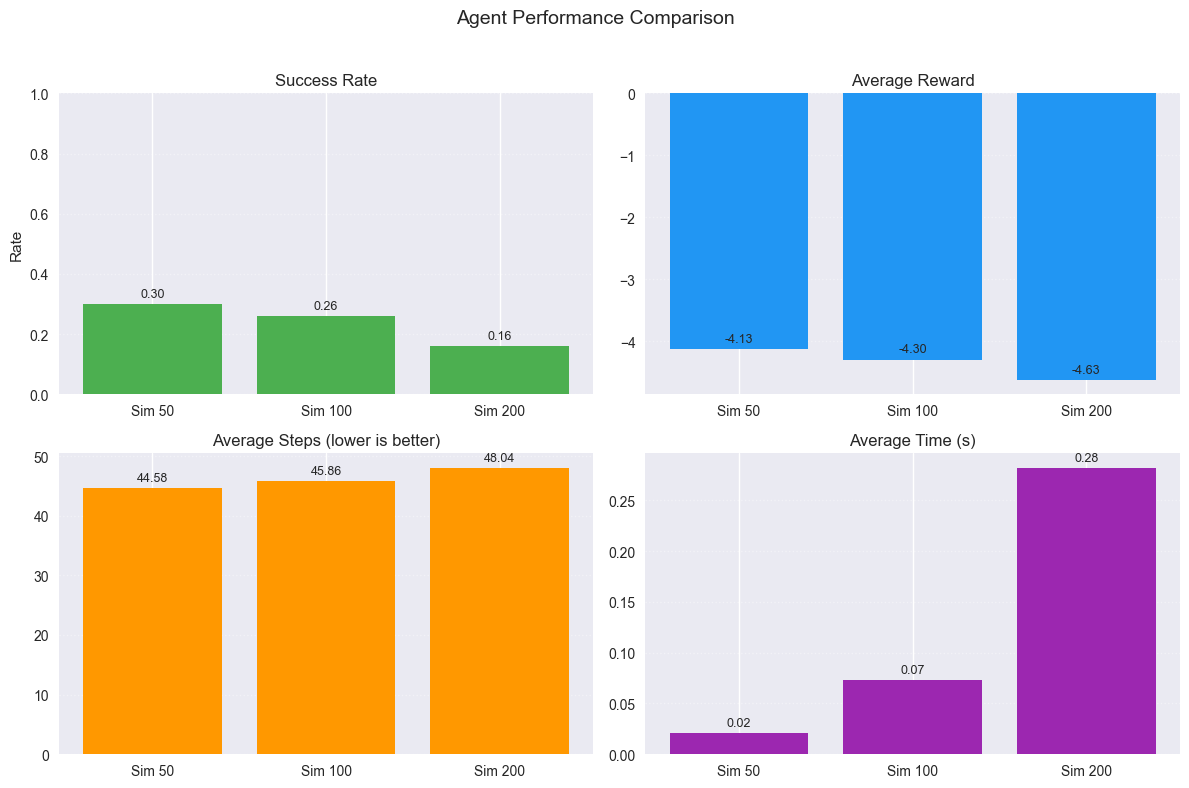

In [11]:
# 结果可视化（成功率/回报/步数/时间 对比）
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from utils.metrics import plot_results

file_paths = [cfg["output_file"] for cfg in config_list]
labels = [f"Sim {cfg['agent_args']['n_simulations']}" for cfg in config_list]

plot_results(file_paths, labels)


## 🔍 实验总结：

- 在较小模拟次数（50）和较浅搜索深度（5）下，智能体容易做出局部次优决策。
- 随着模拟次数与深度增加，MCTS 能够探索更远的未来路径，成功率和平均回报明显上升。
- 但注意：模拟次数越高，计算时间也越长，需平衡性能与效率。

## ✅ 下一步建议：

- 尝试加入启发式策略，优化 rollout
- 分析节点访问次数，观察搜索分布
- 与随机或贪婪策略对比

---
